<a href="https://colab.research.google.com/github/celetrialprince166/MiniProject_emotion_ai/blob/main/Copy_of_SED_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ravdess-tess:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3038847%2F5222996%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240528%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240528T130724Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d0ef7c83227f6af64ec1638f683ff426146381b45b9a9c54ecc95c475afffd21b22699b1b4b499bde3ebeb59026793aa7d438861aa81cd9b90cc8cb53374eb2b99a7b0661d72fc0f12c78f9bca1bd3bebf5cbf87d9aa61e83fcb7d2df99a7cb9b8f43c80b00a898ae374b7960ce41f8e35deecb587b77cbe49a9c05b07a768d93eca1a0d00e29c65a3300c919ed358f3774d0081be9a018fc49acd4c59b61758f096cf0d66a1a9726e744b96e0d6ed91eff693cc32f6bcce3db19b36d0c33972fb6743b19cc3b29dfe184d60ecfadfd37870c990d4dc54a557b28551fedc1b58d232e3ea3305b4de96737177428d102de3dd6b84acb1a80c36ee20e6043b008'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[                                                  ] 7454720 bytes downloaded

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

## Load Data Set

In [ ]:
paths= []
labels = []
for dirname,_, filenames in os.walk("/kaggle/input/ravdess-tess/TESS/"):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split("_")[-1]
        label= label.split(".")[0]
        labels.append(label.lower())

print("Data set is loaded")

Data set is loaded


In [ ]:
paths[:5]

['/kaggle/input/ravdess-tess/TESS/TESS/YAF_home_fear.wav',
 '/kaggle/input/ravdess-tess/TESS/TESS/OAF_gap_fear.wav',
 '/kaggle/input/ravdess-tess/TESS/TESS/OAF_choice_fear.wav',
 '/kaggle/input/ravdess-tess/TESS/TESS/YAF_jail_happy.wav',
 '/kaggle/input/ravdess-tess/TESS/TESS/OAF_germ_sad.wav']

In [ ]:
labels[-1]

'disgust'

In [ ]:
# Tess create data frame

tess_df= pd.DataFrame()
tess_df["speech"]= paths
tess_df["label"]= labels
tess_df["label"].replace({ "ps":'surprise'}, inplace=True)
tess_df.tail()

speech     label
2795  /kaggle/input/ravdess-tess/TESS/TESS/YAF_boat_...  surprise
2796  /kaggle/input/ravdess-tess/TESS/TESS/OAF_phone...  surprise
2797  /kaggle/input/ravdess-tess/TESS/TESS/YAF_hire_...       sad
2798  /kaggle/input/ravdess-tess/TESS/TESS/YAF_back_...     happy
2799  /kaggle/input/ravdess-tess/TESS/TESS/YAF_book_...   disgust

In [ ]:
tess_df.label.value_counts()

label
fear        400
happy       400
sad         400
angry       400
neutral     400
disgust     400
surprise    400
Name: count, dtype: int64

In [ ]:
path = os.getcwd()
path

'/kaggle/working'

In [ ]:
# Ravdess Data set
rav_paths= []
rav_labels=[]

for dirname,_, filenames in os.walk("/kaggle/input/ravdess-tess/Audio_Speech_Actors_01-24/"):
    for filename in filenames:
        rav_paths.append(os.path.join(dirname,filename))
        rav_labels.append(filename.split("-")[2])
rav_df= pd.DataFrame()
rav_df["speech"]= rav_paths
rav_df["label"]= rav_labels
rav_df["label"].replace({"01":'neutral', "02":'calm', "03":'happy', "04":'sad', "05":'angry', "06":'fear', "07":'disgust', "08":'surprise'}, inplace=True)
rav_df.head()

print("Data set is loaded")


Data set is loaded


In [ ]:
print(rav_df.label.value_counts())
tess_df.label.value_counts()

label
surprise    192
disgust     192
fear        192
sad         192
happy       192
calm        192
angry       192
neutral      96
Name: count, dtype: int64


label
fear        400
happy       400
sad         400
angry       400
neutral     400
disgust     400
surprise    400
Name: count, dtype: int64

In [ ]:
new_rav_df = rav_df[rav_df["label"]!= "calm"]
new_rav_df

speech     label
0     /kaggle/input/ravdess-tess/Audio_Speech_Actors...  surprise
1     /kaggle/input/ravdess-tess/Audio_Speech_Actors...   neutral
2     /kaggle/input/ravdess-tess/Audio_Speech_Actors...   disgust
3     /kaggle/input/ravdess-tess/Audio_Speech_Actors...   disgust
4     /kaggle/input/ravdess-tess/Audio_Speech_Actors...   neutral
...                                                 ...       ...
1435  /kaggle/input/ravdess-tess/Audio_Speech_Actors...      fear
1436  /kaggle/input/ravdess-tess/Audio_Speech_Actors...     angry
1437  /kaggle/input/ravdess-tess/Audio_Speech_Actors...       sad
1438  /kaggle/input/ravdess-tess/Audio_Speech_Actors...   disgust
1439  /kaggle/input/ravdess-tess/Audio_Speech_Actors...     angry

[1248 rows x 2 columns]

In [ ]:
new_rav_df.label.value_counts()

label
surprise    192
disgust     192
fear        192
happy       192
sad         192
angry       192
neutral      96
Name: count, dtype: int64

In [ ]:
df = pd.concat([new_rav_df, tess_df], axis = 0)

In [ ]:
df_values=df.label.value_counts()

In [ ]:
df.shape

(4048, 2)

## Exploratory Data Analysis

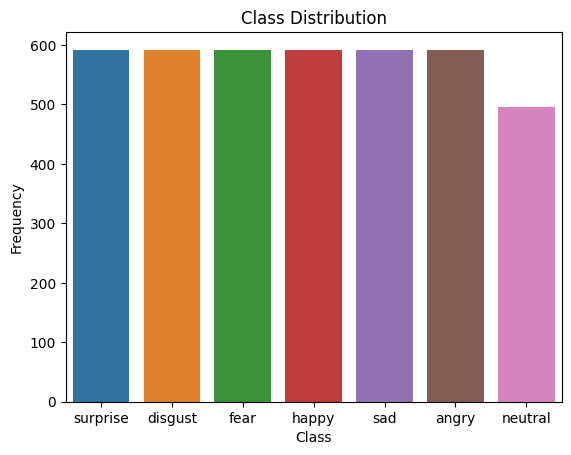

In [ ]:
plt.title('Count of Emotions', size=16)
sns.barplot(x=df_values.index, y=df_values.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [ ]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()


def spectogram(data,sr,emotion):
    x= librosa.stft(data)
    xdb= librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlim([0,4])
    plt.ylim([-0.6,0.6])
    plt.show()

In [ ]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

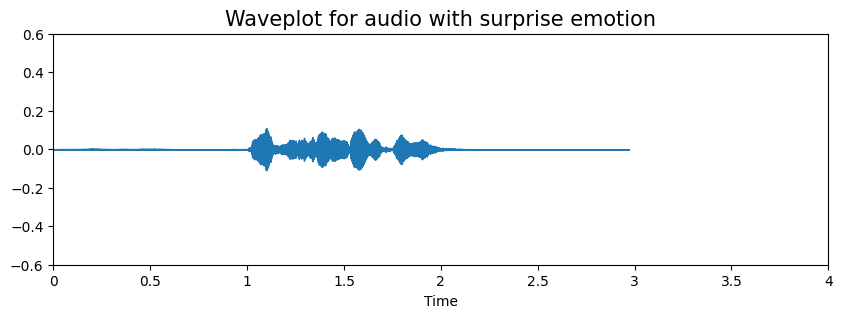

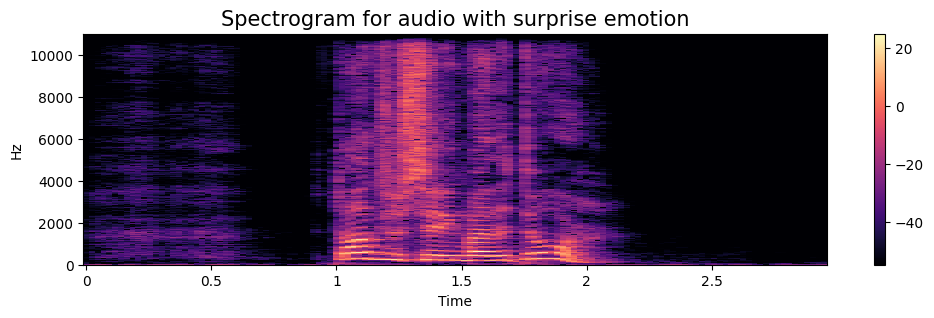

In [ ]:
emotion = "surprise"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)

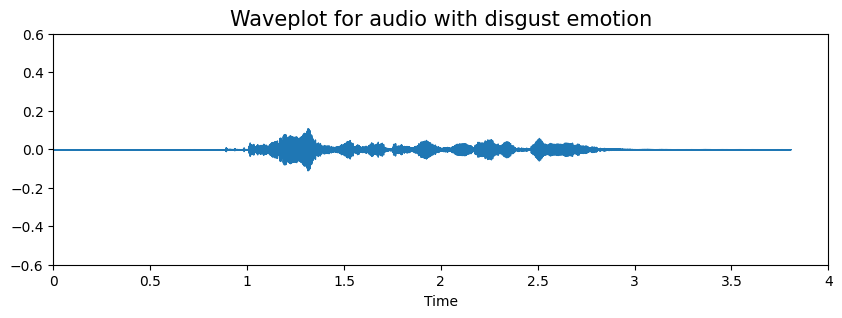

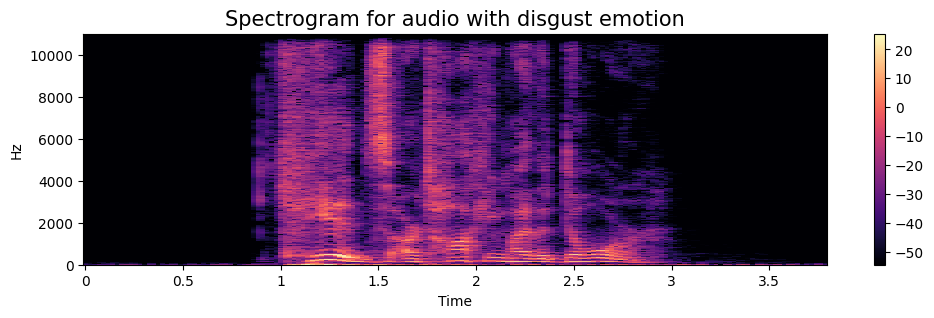

In [ ]:
emotion = "disgust"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)

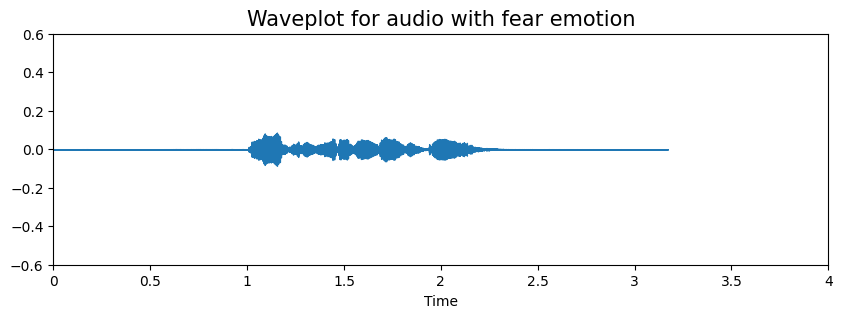

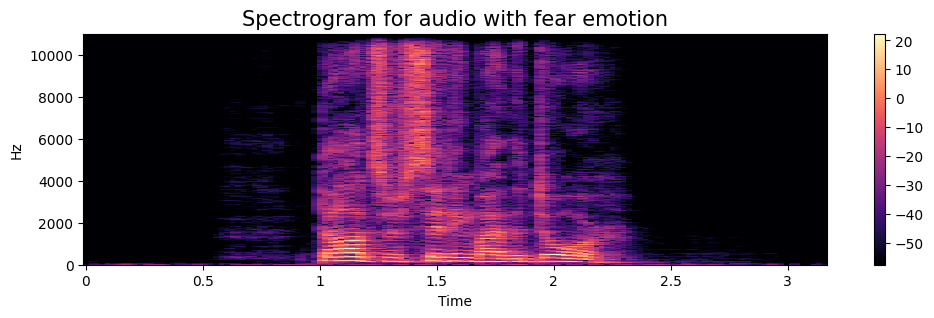

In [ ]:
emotion = "fear"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)

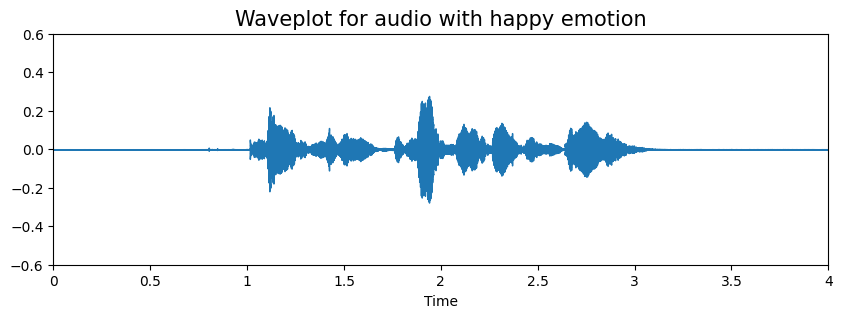

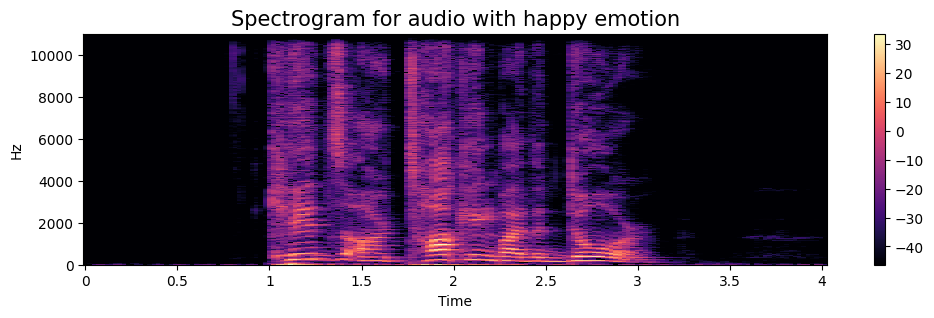

In [ ]:
emotion = "happy"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)

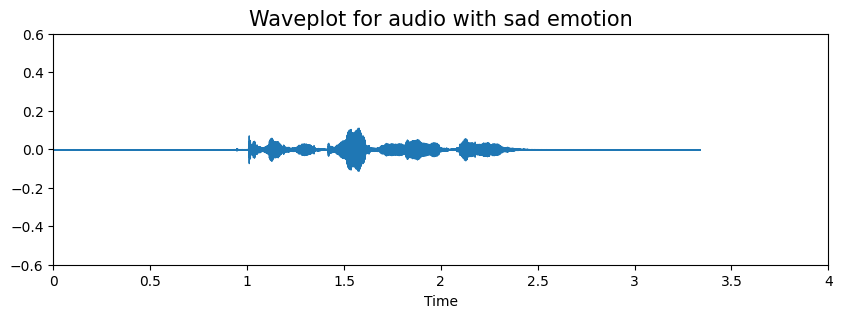

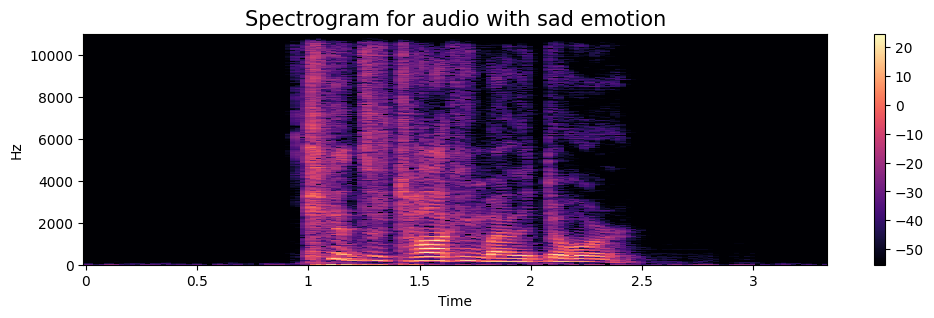

In [ ]:
emotion = "sad"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)

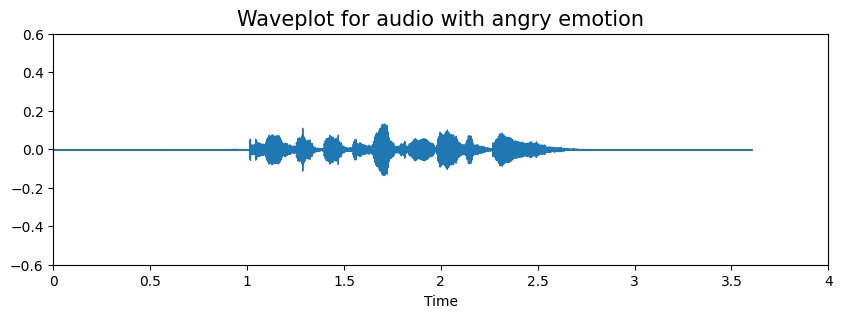

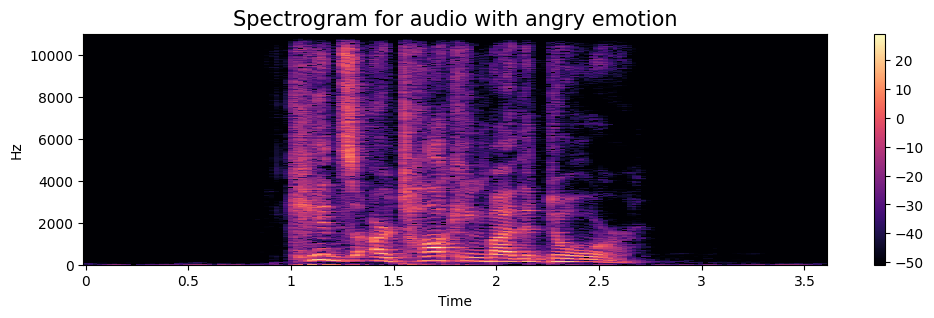

In [ ]:
emotion = "angry"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)


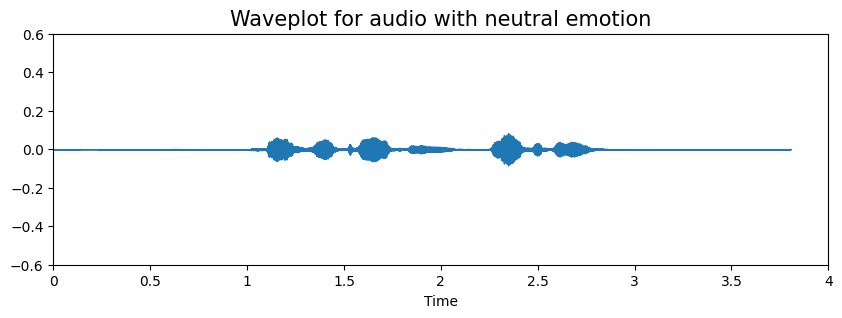

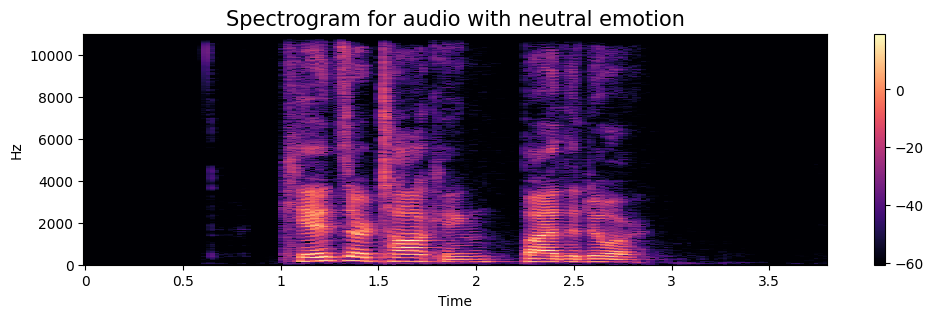

In [ ]:
emotion = "neutral"
path= np.array(df["speech"][df["label"]==emotion])[50]
data,sr= librosa.load(path)
create_waveplot(data,sr,emotion)
create_spectrogram(data,sr,emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size = data.shape[0])
    return data

In [ ]:
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

In [ ]:
def shift(data):
    shift_range = int(np.random.uniform(low = -5, high = 5)*1000)
    return np.roll(data, shift_range)

In [ ]:
def pitch(data, sampling_rate, pitch_factor = 0.7):
    return librosa.effects.pitch_shift(y=data,sr= sampling_rate,n_steps =pitch_factor)

In [ ]:
# taking any example and checking for techniques.
path = np.array(df.speech)[2]
data, sample_rate = librosa.load(path)


In [ ]:
path

'/kaggle/input/ravdess-tess/Audio_Speech_Actors_01-24/Actor_02/03-01-07-02-01-02-02.wav'

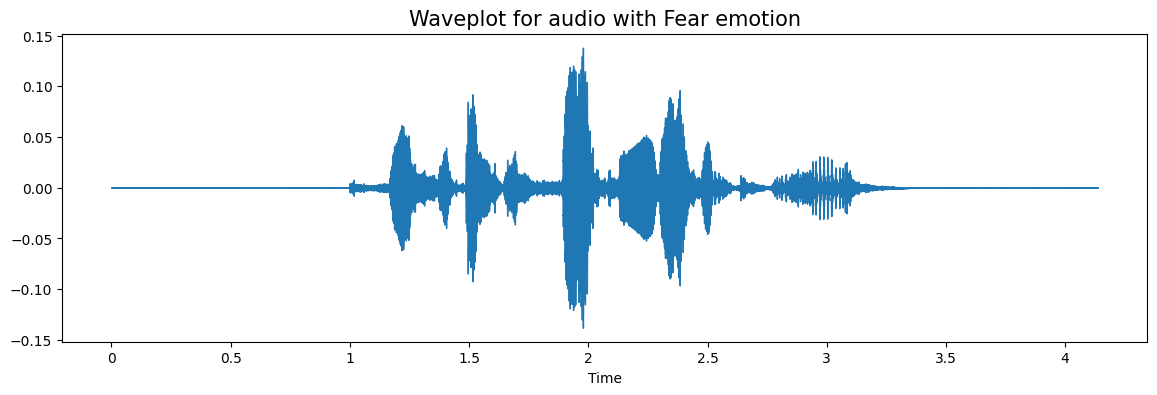

In [ ]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = data, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion', size = 15)
Audio(path)

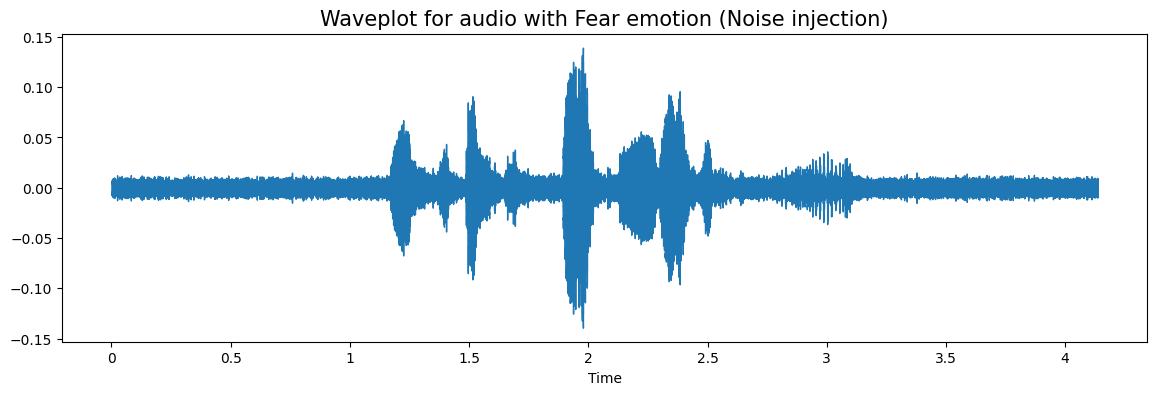

In [ ]:
x = noise(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion (Noise injection)', size = 15)
Audio(x, rate = sample_rate)

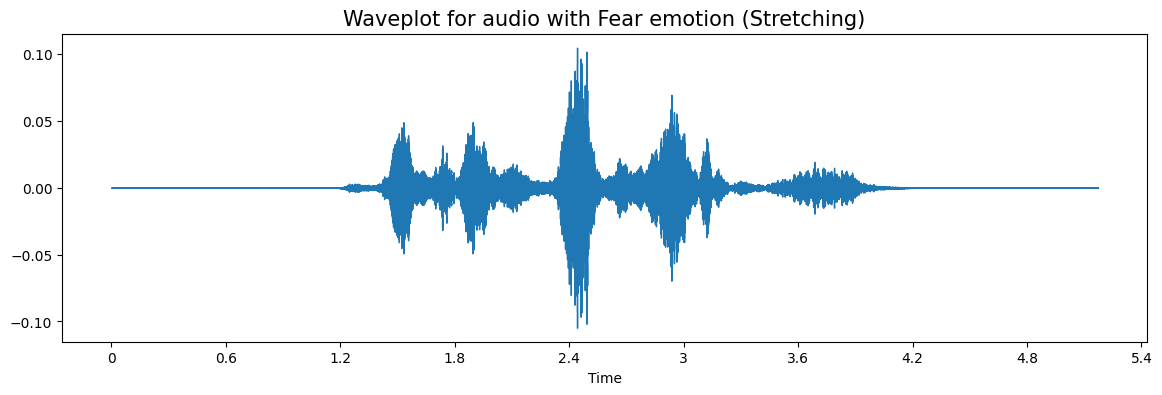

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot for audio with Fear emotion (Stretching)', size=15)
Audio(x, rate=sample_rate)

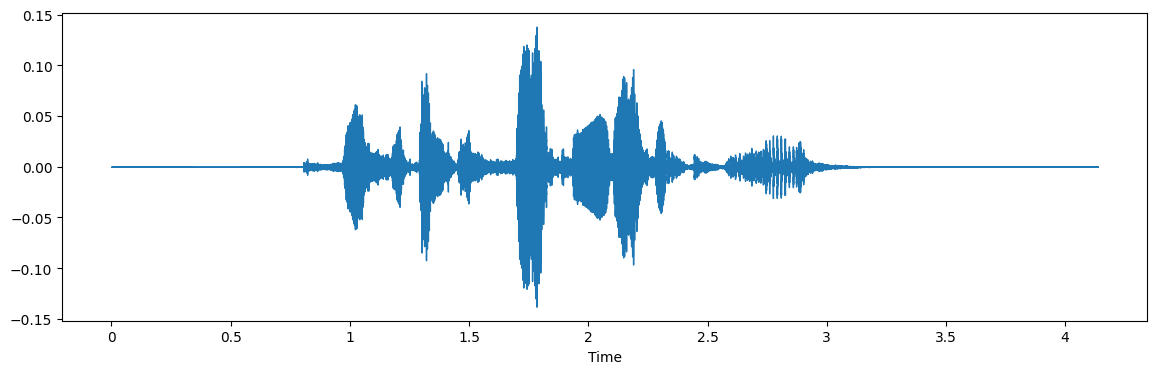

In [ ]:
x = shift(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

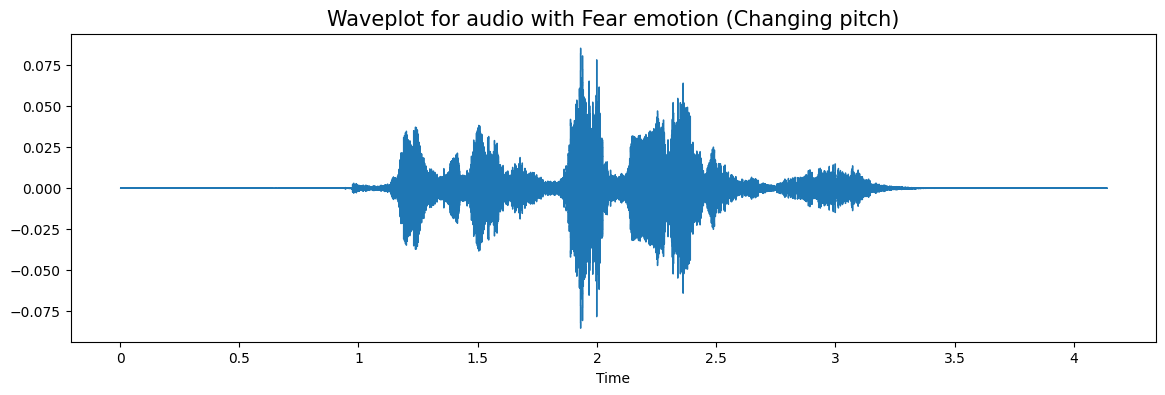

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion (Changing pitch)', size = 15)
Audio(x, rate = sample_rate)

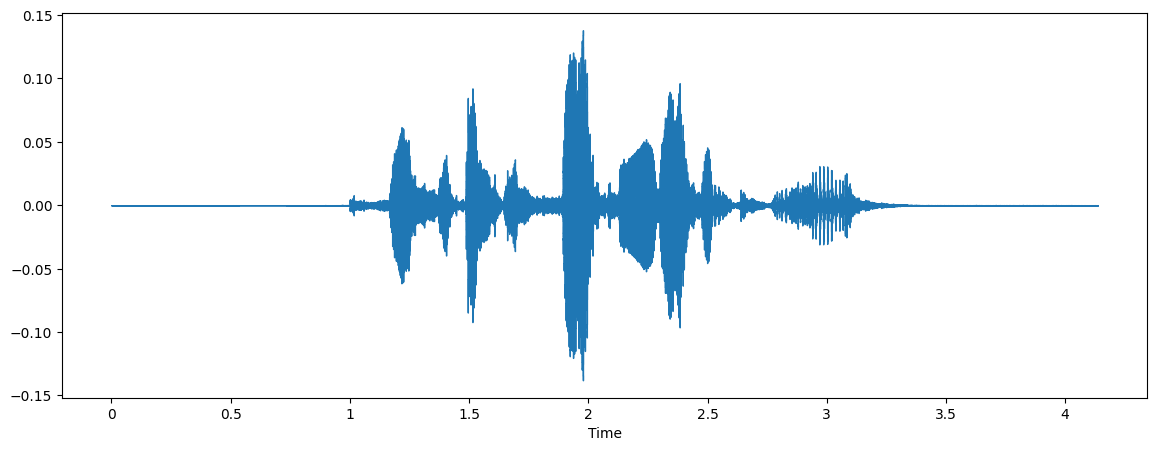

In [ ]:
x, sr = data, sample_rate
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

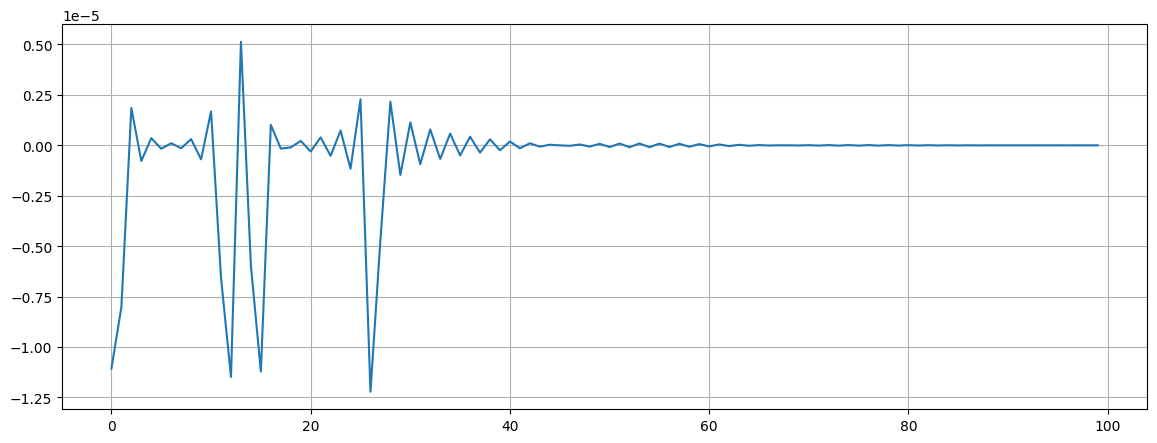

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

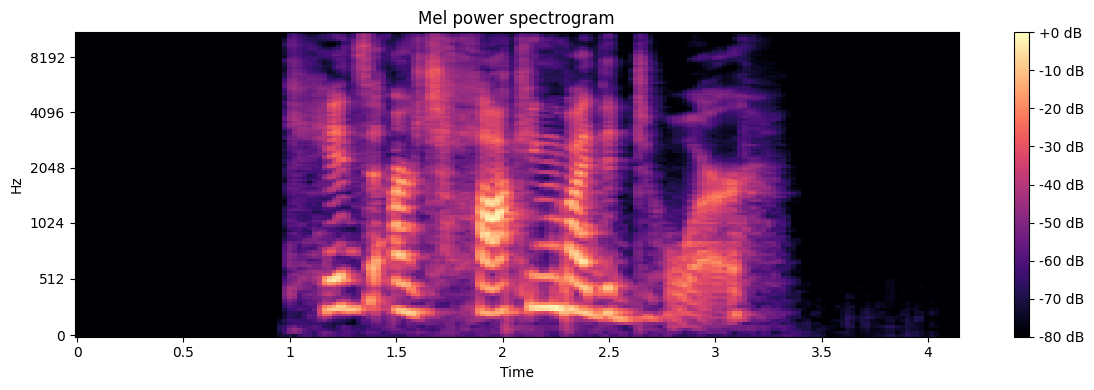

In [ ]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

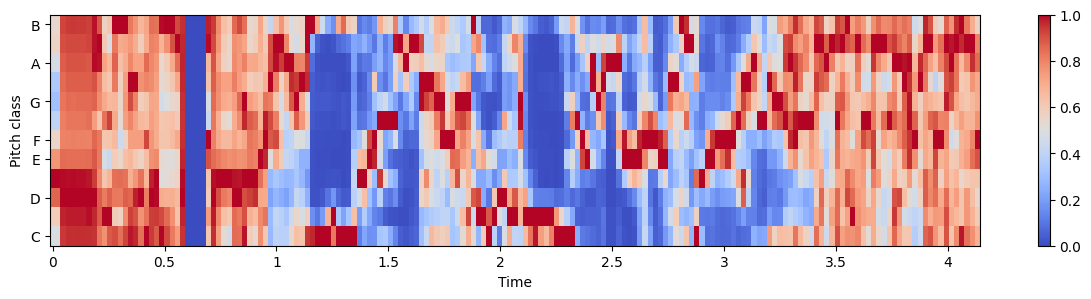

In [ ]:
x, sr = data, sample_rate
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)

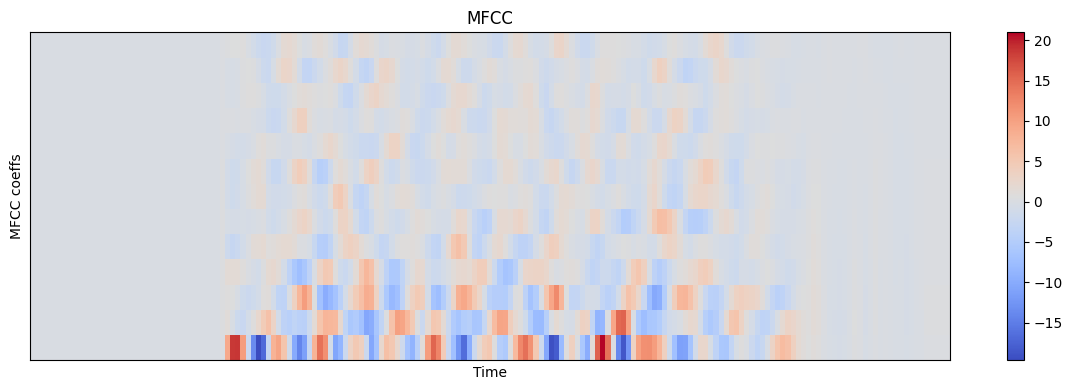

In [ ]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
data.shape

(91231,)

In [ ]:
mfcc.shape

(13, 179)

## Feature Extraction

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start
    # and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(df.speech, df.label):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), df.speech.shape

(12144, 12144, (4048,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index = False)
Features.shape

(12144, 163)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
X,Y

(array([[2.37381547e-01, 6.82273209e-01, 6.70518875e-01, ...,
         2.74813152e-04, 1.72674409e-04, 2.89672880e-05],
        [3.04389106e-01, 7.10022962e-01, 7.16497646e-01, ...,
         5.25683021e-04, 4.35784443e-04, 2.86682079e-04],
        [1.85698785e-01, 7.01609492e-01, 6.69990957e-01, ...,
         7.36232614e-05, 3.07159789e-05, 2.44406920e-06],
        ...,
        [9.44956187e-02, 5.72808802e-01, 5.02954841e-01, ...,
         5.37458582e-05, 4.13421658e-05, 2.78995617e-06],
        [2.94143264e-01, 7.06686303e-01, 6.84475250e-01, ...,
         5.76311019e-03, 5.95648661e-03, 6.10731566e-03],
        [1.15591398e-01, 5.60580850e-01, 6.11997485e-01, ...,
         3.63012769e-05, 1.46054108e-05, 1.61366881e-06]]),
 array(['surprise', 'surprise', 'surprise', ..., 'disgust', 'disgust',
        'disgust'], dtype=object))

In [ ]:
X1 = X
Y1 = Y

In [ ]:
X2 = X1
Y2 = Y1

In [ ]:
Y1

array(['surprise', 'surprise', 'surprise', ..., 'disgust', 'disgust',
       'disgust'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
test_y =Y
test_y.reshape(-1,1)

array([['surprise'],
       ['surprise'],
       ['surprise'],
       ...,
       ['disgust'],
       ['disgust'],
       ['disgust']], dtype=object)

In [ ]:
Y=Y.reshape(-1,1)
np.array(Y).shape

(12144, 1)

In [ ]:
encoder = LabelEncoder()
encoder = OneHotEncoder()
Y_enc = encoder.fit_transform(Y)
Y = encoder.fit_transform(Y)

In [ ]:
Y.shape

(12144, 7)

In [ ]:

# Y= Y.toarray()
# Y1=Y1.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((9108, 162), (9108, 7), (3036, 162), (3036, 7))

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state=0, shuffle=True)
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((9108, 162), (9108,), (3036, 162), (3036,))

In [ ]:
steps = [('scaler', StandardScaler()),
        ('DT', DecisionTreeClassifier(max_depth = 6))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
dt_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
dt_unscaled = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(dt_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(dt_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.43774703557312256
Accuracy without Scaling: 0.4380764163372859


In [ ]:
dt_pred_s = dt_scaled.predict(X_test)
dt_pred = dt_unscaled.predict(X_test)

In [ ]:
print("Decision Tree Scaled")
print(classification_report(y_test, dt_pred_s))
print("Decision Tree Unscaled")
# print(classification_report(y_test, dt_pred))

In [ ]:
dt_pred_s.shape,y_test.shape

((3036, 7), (3036, 1))

In [ ]:
steps = [('scaler', StandardScaler()),
        ('RF', RandomForestClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
rf_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
rf_unscaled = RandomForestClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rf_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(rf_unscaled.score(X_test, y_test)))


In [ ]:
rf_pred_s = rf_scaled.predict(X_test)
rf_pred = rf_unscaled.predict(X_test)

In [ ]:
print("Random Forest Scaled")
print(classification_report(y_test, rf_pred_s))
print("Random Forest Unscaled")
print(classification_report(y_test, rf_pred))

In [ ]:
# # rf_pred = mlp_scaled.predict(X_test)
# y1_pred = encoder.inverse_transform(rf_pred)

# y1_test = encoder.inverse_transform(y_test)

In [ ]:
# print(classification_report(y_test,rf_pred))


In [ ]:
# import keras

In [ ]:
# !pip install tensorflow

In [ ]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('MLP', MLPClassifier(alpha=0.01,
                              batch_size=256,
                              epsilon=1e-08,
                              hidden_layer_sizes=(300,),
                              learning_rate='adaptive',
                              max_iter=500))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: mlp_scaled
mlp_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a MLP classifier to the unscaled data
mlp_unscaled =  MLPClassifier(alpha=0.01,
                              batch_size=256,
                              epsilon=1e-08,
                              hidden_layer_sizes=(300,),
                              learning_rate='adaptive',
                              max_iter=500).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(mlp_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(mlp_unscaled.score(X_test, y_test)))

In [ ]:
print("MLP Classifier Scaled")
print(classification_report(y_test, mlp_pred_s))
print("MLP Classifier Unscaled")
print(classification_report(y_test, mlp_pred))

In [ ]:
# print(classification_report(y_test,pred_test))

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
X_train_s.shape, y_train.shape, X_test_s.shape, y_test.shape

In [ ]:
X_train_d = np.expand_dims(X_train_s, axis=2)
X_test_d = np.expand_dims(X_test_s, axis=2)
X_train_d.shape, y_train.shape, X_test_d.shape, y_test.shape

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train_d.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train_d, y_train, batch_size=64, epochs=50, validation_data=(X_test_d, y_test))

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test_d,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
cnn_test = model.predict(X_test_d)
cnn_pred = encoder.inverse_transform(cnn_test)

In [ ]:
y_test = encoder.inverse_transform(y_test)

In [ ]:
print(classification_report(y_test, cnn_pred))

In [ ]:
cnn_test.shape

In [ ]:
mlp_gs = MLPClassifier(max_iter = 500)
parameter_space = {
    'hidden_layer_sizes': [(300,350)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'batch_size' : [200, 256],
    'epsilon' : [1e-08]
}
# (alpha=0.01,
#                               batch_size=256,
#                               epsilon=1e-08,
#                               hidden_layer_sizes=(300,),
#                               learning_rate='adaptive',
#                               max_iter=500
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

In [ ]:
clf.fit(X_train_s, y_train) # X is train samples and y is the corresponding labels

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
y_pred_mlp = clf.predict(X_test_s)

In [ ]:
y_pred_mlp.shape

In [ ]:
# y_pred_mlp = encoder.inverse_transform(y_pred_mlp)

In [ ]:
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [ ]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# for train_indices, test_indices in kf.split(X):
#     clf.fit(X[train_indices], Y[train_indices])
#     print(clf.score(X[test_indices], Y[test_indices]))

## Model creation LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM ,Dropout

In [ ]:
model= Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation = "relu"),
    Dropout(0.2),
    Dense(32,activation="relu"),
    Dropout(0.2),
    Dense (8,activation="softmax"),
])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
# train model
history= model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

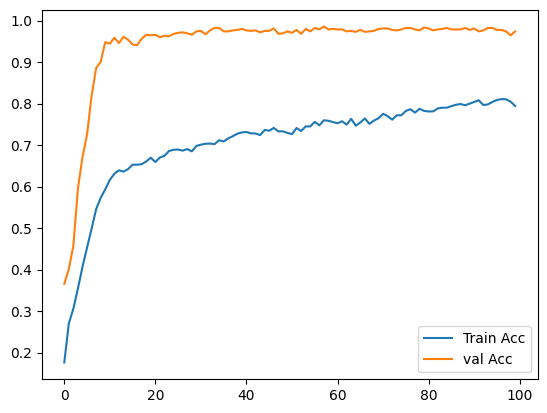

In [ ]:
epochs=list(range(100))
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs,acc,label= "Train Acc")
plt.plot(epochs,val_acc,label="val Acc")
plt.legend()
plt.show()

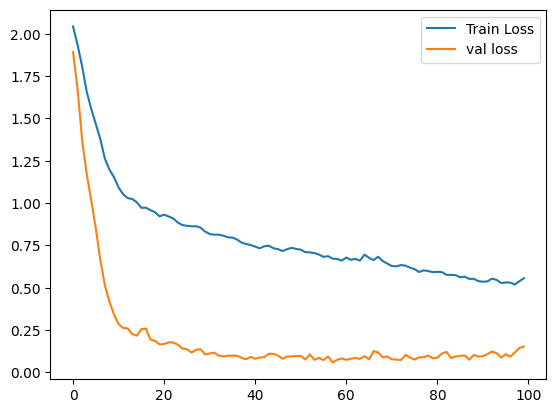

In [ ]:
epochs=list(range(100))
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs,loss,label= "Train Loss")
plt.plot(epochs,val_loss,label="val loss")
plt.legend()
plt.show()

ValueError: None values not supported.

In [ ]:
sound_path = df["speech"][df["label"]=="angry"][11]
sound_path

'/kaggle/input/ravdess-tess/Audio_Speech_Actors_01-24/Actor_02/03-01-05-01-01-02-02.wav'

In [ ]:
def prep_sound(sound_file):
    x_mfcc= extract_mfcc(sound_file)
    x= [x for x in x_mfcc ]
    x = np.array(x)
    x= np.expand_dims(x,-1)
    return x

X_pred=prep_sound(sound_path)


In [ ]:
predictions = model.predict(X_pred)

# Interpret the output
# For example, if you're doing classification, you can get the predicted class label
predicted_classes = predictions.argmax(axis=0)
print(predicted_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[31  4  3  3 17  1  0 39]


In [ ]:
prob = [predictions for index in predicted_classes]

In [ ]:
prede = enc.inverse_transform(predicted_classes.reshape(1,8))
pd.DataFrame(prede)

0
0  surprise

In [ ]:
# prede = enc.inverse_transform(mean_val.values.reshape(1,8))
pd.DataFrame(predictions).corr()

0         1         2         3         4         5         6  \
0  1.000000 -0.726751  0.840075  0.783666  0.522549 -0.148262 -0.733470   
1 -0.726751  1.000000 -0.399346 -0.350834 -0.086322 -0.314349  0.522249   
2  0.840075 -0.399346  1.000000  0.944789  0.738290 -0.325906 -0.736573   
3  0.783666 -0.350834  0.944789  1.000000  0.669684 -0.456506 -0.582920   
4  0.522549 -0.086322  0.738290  0.669684  1.000000 -0.507665 -0.458361   
5 -0.148262 -0.314349 -0.325906 -0.456506 -0.507665  1.000000 -0.343112   
6 -0.733470  0.522249 -0.736573 -0.582920 -0.458361 -0.343112  1.000000   
7  0.978860 -0.706346  0.781347  0.708406  0.581273 -0.136402 -0.729740   

          7  
0  0.978860  
1 -0.706346  
2  0.781347  
3  0.708406  
4  0.581273  
5 -0.136402  
6 -0.729740  
7  1.000000

In [ ]:
prediction_Dict={
    'label_angry':predicted_classes[0],
    'label_calm':predicted_classes[1],
    'label_disgust':predicted_classes[2],
    'label_fear':predicted_classes[3],
    'label_happy':predicted_classes[4],
    'label_neutral':predicted_classes[5],
    'label_sad':predicted_classes[6],
    'label_surprise':predicted_classes[7]
}
print(prediction_Dict)

{'label_angry': 38, 'label_calm': 10, 'label_disgust': 17, 'label_fear': 39, 'label_happy': 26, 'label_neutral': 1, 'label_sad': 0, 'label_surprise': 34}


In [ ]:
pred =enc.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report("surprise", pred)